# ML

## Data Loading

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("/kaggle/input/alzheimers-prediction-dataset-global/alzheimers_prediction_dataset.csv")            

In [2]:
import os
os.environ["IPYTHONDIR"] = "/tmp"

In [3]:
df

,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,...,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis
0,Spain,90,Male,1,33.0,Medium,Never,Occasionally,No,No,...,Healthy,High,Retired,Single,No,Low,Medium,High,Urban,No
1,Argentina,72,Male,7,29.9,Medium,Former,Never,No,No,...,Healthy,Medium,Unemployed,Widowed,No,High,Low,High,Urban,No
2,South Africa,86,Female,19,22.9,High,Current,Occasionally,No,Yes,...,Average,Medium,Employed,Single,No,Low,Medium,High,Rural,No
3,China,53,Male,17,31.2,Low,Never,Regularly,Yes,No,...,Healthy,Medium,Retired,Single,No,High,Medium,Low,Rural,No
4,Sweden,58,Female,3,30.0,High,Former,Never,Yes,No,...,Unhealthy,High,Employed,Married,No,Low,Medium,High,Rural,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74278,Russia,60,Female,3,22.6,High,Former,Never,No,No,...,Average,High,Unemployed,Widowed,No,Medium,High,Medium,Rural,No
74279,UK,58,Male,18,30.6,Low,Never,Occasionally,Yes,No,...,Average,Medium,Unemployed,Single,No,Medium,High,High,Rural,No
74280,Spain,57,Female,13,28.2,Medium,Never,Regularly,No,No,...,Healthy,Low,Employed,Single,Yes,High,Low,Low,Rural,No
74281,Brazil,73,Female,7,29.0,Low,Never,Regularly,No,No,...,Healthy,Low,Employed,Widowed,No,Low,Low,High,Rural,No


## EDA

In [4]:
df.info()
# null 값 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74283 entries, 0 to 74282
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Country                               74283 non-null  object 
 1   Age                                   74283 non-null  int64  
 2   Gender                                74283 non-null  object 
 3   Education Level                       74283 non-null  int64  
 4   BMI                                   74283 non-null  float64
 5   Physical Activity Level               74283 non-null  object 
 6   Smoking Status                        74283 non-null  object 
 7   Alcohol Consumption                   74283 non-null  object 
 8   Diabetes                              74283 non-null  object 
 9   Hypertension                          74283 non-null  object 
 10  Cholesterol Level                     74283 non-null  object 
 11  Family History 

In [5]:
df.describe()

,Age,Education Level,BMI,Cognitive Test Score
count,74283.000000,74283.000000,74283.000000,74283.000000
mean,71.964703,9.487514,26.780639,64.654241
std,12.980748,5.757020,4.764679,20.153247
min,50.000000,0.000000,18.500000,30.000000
25%,61.000000,4.000000,22.700000,47.000000
50%,72.000000,9.000000,26.800000,65.000000
75%,83.000000,14.000000,30.900000,82.000000
max,94.000000,19.000000,35.000000,99.000000


In [6]:
print(df.dtypes)
# diagnosis 열도 yes/no 라는 문자열로 되어 있음

Country                                  object
Age                                       int64
Gender                                   object
Education Level                           int64
BMI                                     float64
Physical Activity Level                  object
Smoking Status                           object
Alcohol Consumption                      object
Diabetes                                 object
Hypertension                             object
Cholesterol Level                        object
Family History of Alzheimer’s            object
Cognitive Test Score                      int64
Depression Level                         object
Sleep Quality                            object
Dietary Habits                           object
Air Pollution Exposure                   object
Employment Status                        object
Marital Status                           object
Genetic Risk Factor (APOE-ε4 allele)     object
Social Engagement Level                 

In [7]:
df.duplicated().sum()
# 중복된 행 없음

0

In [8]:
df["Diabetes"].value_counts()

Diabetes
No     59527
Yes    14756
Name: count, dtype: int64

In [9]:
df["Alzheimer’s Diagnosis"].value_counts()

Alzheimer’s Diagnosis
No     43570
Yes    30713
Name: count, dtype: int64

### 간단한 시각화

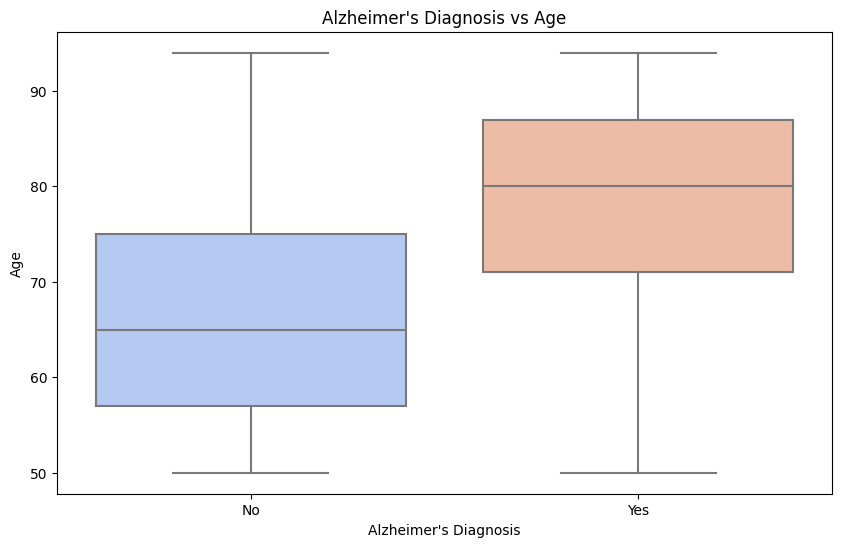

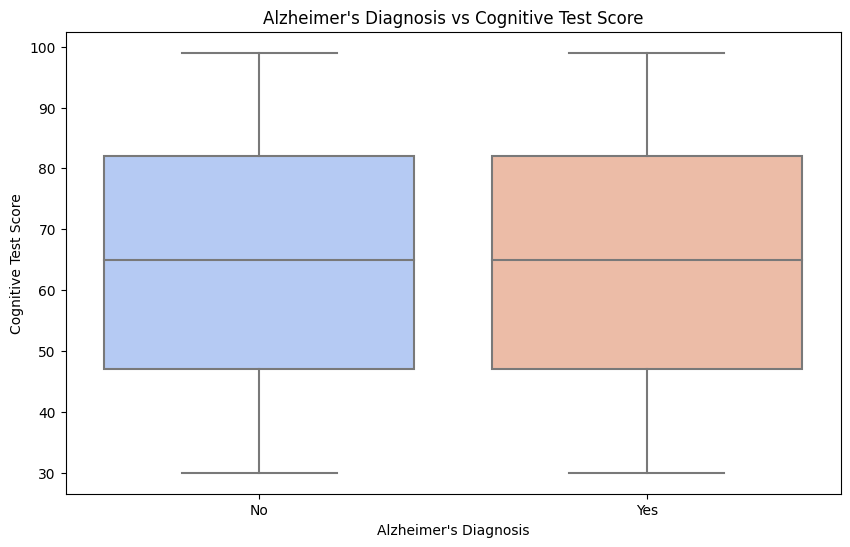

In [10]:
# Alzheimer’s Diagnosis vs Age
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(x='Alzheimer’s Diagnosis', y='Age', data=df, palette='coolwarm')
plt.title("Alzheimer's Diagnosis vs Age")
plt.xlabel('Alzheimer\'s Diagnosis')
plt.ylabel('Age')
plt.show()

# Alzheimer’s Diagnosis vs Cognitive Test Score
plt.figure(figsize=(10, 6))
sns.boxplot(x='Alzheimer’s Diagnosis', y='Cognitive Test Score', data=df, palette='coolwarm')
plt.title("Alzheimer's Diagnosis vs Cognitive Test Score")
plt.xlabel('Alzheimer\'s Diagnosis')
plt.ylabel('Cognitive Test Score')
plt.show()


## Preprocessing

### Encoding and One Hot Encoding

In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in ['Depression Level','Sleep Quality' ,'Physical Activity Level', 'Smoking Status', 'Alcohol Consumption', 'Dietary Habits', 'Stress Levels','Diabetes', 'Hypertension', 'Alzheimer’s Diagnosis']:
    df[col] = le.fit_transform(df[col])
df = pd.get_dummies(df, columns=[
    'Country', 'Gender', 'Cholesterol Level', 'Marital Status',
    'Family History of Alzheimer’s', 'Urban vs Rural Living',
    'Genetic Risk Factor (APOE-ε4 allele)', 'Social Engagement Level',
    'Income Level', 'Employment Status', 'Air Pollution Exposure'
], drop_first=True)

In [12]:
df

,Age,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,Cognitive Test Score,Depression Level,...,Urban vs Rural Living_Urban,Genetic Risk Factor (APOE-ε4 allele)_Yes,Social Engagement Level_Low,Social Engagement Level_Medium,Income Level_Low,Income Level_Medium,Employment Status_Retired,Employment Status_Unemployed,Air Pollution Exposure_Low,Air Pollution Exposure_Medium
0,90,1,33.0,2,2,1,0,0,90,1,...,True,False,True,False,False,True,True,False,False,False
1,72,7,29.9,2,1,0,0,0,65,1,...,True,False,False,False,True,False,False,True,False,True
2,86,19,22.9,0,0,1,0,1,43,0,...,False,False,True,False,False,True,False,False,False,True
3,53,17,31.2,1,2,2,1,0,81,2,...,False,False,False,False,False,True,True,False,False,True
4,58,3,30.0,0,1,0,1,0,49,0,...,False,False,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74278,60,3,22.6,0,1,0,0,0,42,2,...,False,False,False,True,False,False,False,True,False,False
74279,58,18,30.6,1,2,1,1,0,42,1,...,False,False,False,True,False,False,False,True,False,True
74280,57,13,28.2,2,2,2,0,0,61,1,...,False,True,False,False,True,False,False,False,True,False
74281,73,7,29.0,1,2,2,0,0,97,0,...,False,False,True,False,True,False,False,False,True,False


In [13]:
print(df.dtypes)

Age                                           int64
Education Level                               int64
BMI                                         float64
Physical Activity Level                       int64
Smoking Status                                int64
Alcohol Consumption                           int64
Diabetes                                      int64
Hypertension                                  int64
Cognitive Test Score                          int64
Depression Level                              int64
Sleep Quality                                 int64
Dietary Habits                                int64
Stress Levels                                 int64
Alzheimer’s Diagnosis                         int64
Country_Australia                              bool
Country_Brazil                                 bool
Country_Canada                                 bool
Country_China                                  bool
Country_France                                 bool
Country_Germ

In [14]:
# 분석의 편의를 위해 int로 변환.
bool_cols = df.select_dtypes(include=['bool']).columns
df[bool_cols] = df[bool_cols].astype(int)

### Outliers

In [15]:
print(df.dtypes)

Age                                           int64
Education Level                               int64
BMI                                         float64
Physical Activity Level                       int64
Smoking Status                                int64
Alcohol Consumption                           int64
Diabetes                                      int64
Hypertension                                  int64
Cognitive Test Score                          int64
Depression Level                              int64
Sleep Quality                                 int64
Dietary Habits                                int64
Stress Levels                                 int64
Alzheimer’s Diagnosis                         int64
Country_Australia                             int64
Country_Brazil                                int64
Country_Canada                                int64
Country_China                                 int64
Country_France                                int64
Country_Germ

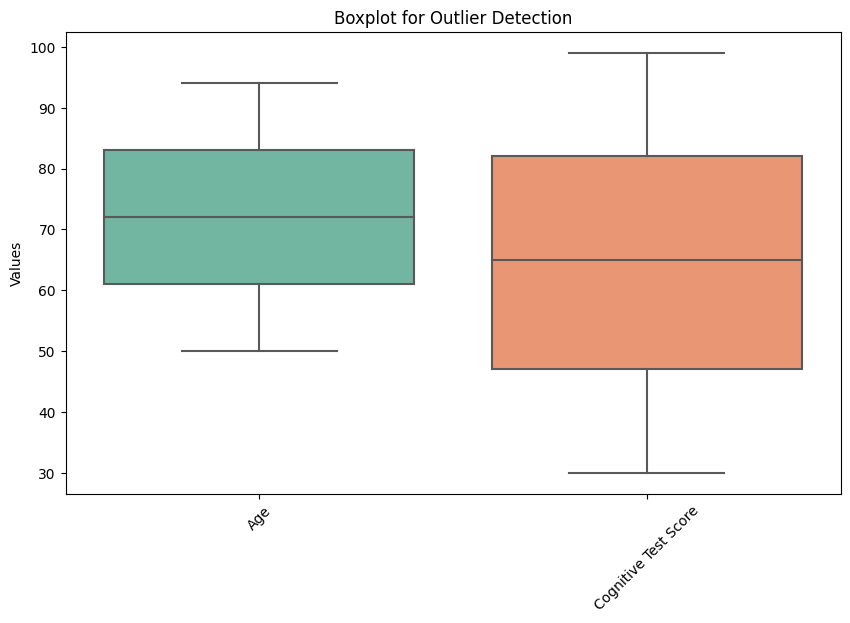

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
numerical_cols = ["Age", "Cognitive Test Score"]
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numerical_cols], palette="Set2")

plt.xticks(rotation=45)
plt.title("Boxplot for Outlier Detection")
plt.ylabel("Values")
plt.show()


### Correlation

In [17]:
df["Alzheimer’s Diagnosis"].value_counts()

Alzheimer’s Diagnosis
0    43570
1    30713
Name: count, dtype: int64

In [18]:
correlation_matrix = df.corr()
target_correlation = correlation_matrix["Alzheimer’s Diagnosis"].sort_values(ascending=False)
print(target_correlation)

# Age                                         0.419923
# Genetic Risk Factor (APOE-ε4 allele)_Yes    0.194484
# Family History of Alzheimer’s_Yes           0.140885

Alzheimer’s Diagnosis                       1.000000
Age                                         0.419923
Genetic Risk Factor (APOE-ε4 allele)_Yes    0.194484
Family History of Alzheimer’s_Yes           0.140885
Country_Russia                              0.042795
Country_India                               0.042032
Country_South Africa                        0.038333
Country_Brazil                              0.034295
Country_Mexico                              0.032645
Income Level_Medium                         0.006950
Employment Status_Retired                   0.004721
Air Pollution Exposure_Low                  0.004571
Education Level                             0.003732
Smoking Status                              0.003690
Dietary Habits                              0.003239
Cholesterol Level_Normal                    0.002104
Social Engagement Level_Low                 0.002053
Alcohol Consumption                         0.001790
Gender_Male                                 0.

## Modelling

In [20]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind, chi2_contingency

# Alzheimer’s Diagnosis를 종속 변수(y)로 설정
y_col = "Alzheimer’s Diagnosis"
y = df[y_col]

# 독립 변수 설정
X = df.drop(columns=[y_col])

# 연속형 변수와 범주형 변수 분리
continuous_vars = X.select_dtypes(include=["int64", "float64"]).columns
categorical_vars = [col for col in continuous_vars if df[col].nunique() <= 10]
continuous_vars = [col for col in continuous_vars if col not in categorical_vars]

significant_features = []
alpha = 0.05  # 유의수준으로 유의미한 피처 찾기

# 연속형 변수: t-test 수행
for col in continuous_vars:
    group1 = df[df[y_col] == 0][col]
    group2 = df[df[y_col] == 1][col]
    stat, p_value = ttest_ind(group1, group2, equal_var=False)
    if p_value < alpha:
        significant_features.append(col)

# 범주형 변수: 카이제곱 검정 수행
for col in categorical_vars:
    contingency_table = pd.crosstab(df[col], y)
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    if p_value < alpha:
        significant_features.append(col)

print("feature:", significant_features)

feature: ['Age', 'Country_Brazil', 'Country_Canada', 'Country_China', 'Country_India', 'Country_Italy', 'Country_Japan', 'Country_Mexico', 'Country_Norway', 'Country_Russia', 'Country_South Africa', 'Country_Sweden', 'Country_USA', 'Family History of Alzheimer’s_Yes', 'Genetic Risk Factor (APOE-ε4 allele)_Yes']


In [21]:
# X = df[['Age', 'Genetic Risk Factor (APOE-ε4 allele)_Yes', 'Family History of Alzheimer’s_Yes',
#         'Country_Russia', 'Country_India', 'Country_South Africa', 'Country_Brazil', 'Country_Mexico']]
X = df[significant_features]
y = df['Alzheimer’s Diagnosis']

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import lightgbm as lgb
from imblearn.over_sampling import SMOTE
import catboost as cb


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 1. Logistic Regression

In [24]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
acc_lr=accuracy_score(y_test, y_pred)
print("Accuracy:",acc_lr )
print(classification_report(y_test, y_pred))

Accuracy: 0.7152857239011914
              precision    recall  f1-score   support

           0       0.74      0.80      0.77      8719
           1       0.68      0.60      0.63      6138

    accuracy                           0.72     14857
   macro avg       0.71      0.70      0.70     14857
weighted avg       0.71      0.72      0.71     14857



### 2. Random Forest

In [25]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
acc_rf=accuracy_score(y_test, y_pred_rf)
print("🔹 Random Forest Classifier Results:")
print("Accuracy:",acc_rf )
print(classification_report(y_test, y_pred_rf))


🔹 Random Forest Classifier Results:
Accuracy: 0.7189876825738709
              precision    recall  f1-score   support

           0       0.76      0.76      0.76      8719
           1       0.66      0.65      0.66      6138

    accuracy                           0.72     14857
   macro avg       0.71      0.71      0.71     14857
weighted avg       0.72      0.72      0.72     14857



### Decision Tree

In [26]:
dt_params = {'max_depth': [3, 5, 10, 15, None]}
dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_params, cv=5, scoring='accuracy')
dt_grid.fit(X_train, y_train)
dt_best = dt_grid.best_estimator_

y_pred_dt = dt_best.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred_dt)

print("🔹 Decision Tree Results:")
print("Best Parameters:", dt_grid.best_params_)
print("Accuracy:", acc_dt)
print(classification_report(y_test, y_pred_dt))

🔹 Decision Tree Results:
Best Parameters: {'max_depth': 5}
Accuracy: 0.7256512081846941
              precision    recall  f1-score   support

           0       0.78      0.75      0.76      8719
           1       0.66      0.70      0.68      6138

    accuracy                           0.73     14857
   macro avg       0.72      0.72      0.72     14857
weighted avg       0.73      0.73      0.73     14857



### XGBoost

In [ ]:
# xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, use_label_encoder=False, eval_metric='logloss')
# xgb_model.fit(X_train, y_train)

# y_pred_xgb = xgb_model.predict(X_test)
# acc_xgb = accuracy_score(y_test, y_pred_xgb)
# print("🔹 XGBoost Classifier Results:")
# print("Accuracy:", acc_xgb)
# print(classification_report(y_test, y_pred_xgb))

### LightGBM

In [ ]:
# lgb_model = lgb.LGBMClassifier(boosting_type='gbdt', num_leaves=31, learning_rate=0.05, 
#                                 n_estimators=200, force_col_wise=True, random_state=42)
# lgb_model.fit(X_train_resampled, y_train_resampled)

# y_pred_lgb = lgb_model.predict(X_test)

# print("🔹 LightGBM Model Performance 🔹")
# print("Accuracy:", accuracy_score(y_test, y_pred_lgb))
# print(classification_report(y_test, y_pred_lgb))

### Catboost

In [ ]:
# cat_model = cb.CatBoostClassifier(iterations=200, depth=6, learning_rate=0.05, loss_function='Logloss', verbose=0, random_seed=42)
# cat_model.fit(X_train_resampled, y_train_resampled)

# y_pred_cat = cat_model.predict(X_test)

# print("🔹 CatBoost Model Performance 🔹")
# print("Accuracy:", accuracy_score(y_test, y_pred_cat))
# print(classification_report(y_test, y_pred_cat))

### Hyperparameter 최적화 (LightGBM, XGBoost, Catboost)

#### LightGBM

In [28]:
import optuna
import lightgbm as lgb
from sklearn.model_selection import cross_val_score

# Optuna 로그 레벨 최소화
optuna.logging.set_verbosity(optuna.logging.WARNING)

# 최적화할 목적 함수 정의
def lgb_objective(trial):
    param = {
        'boosting_type': 'gbdt',
        'num_leaves': trial.suggest_int('num_leaves', 20, 50),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', -1, 10),
        'random_state': 42
    }
    
    # LightGBM 모델 학습 & 검증 정확도 계산
    model = lgb.LGBMClassifier(**param)
    score = cross_val_score(model, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy').mean()
    
    return score  # Optuna가 이 값을 최대화

# Optuna 스터디 생성 및 최적화
lgb_study = optuna.create_study(direction='maximize')
lgb_study.optimize(lgb_objective, n_trials=50, show_progress_bar=True)  # ✅ 진행률 표시


# 최적의 하이퍼파라미터 출력
print("🔹 최적의 파라미터:", lgb_study.best_params)
print("🔹 최적의 정확도:", lgb_study.best_value)


# 🔹 최적의 파라미터: {'num_leaves': 25, 'learning_rate': 0.0696857693259541, 'n_estimators': 157, 'max_depth': 0}
# 🔹 최적의 정확도: 0.7325327407149438

  0%|          | 0/50 [00:00<?, ?it/s]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 27881, number of negative: 27880
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003455 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 74
[LightGBM] [Info] Number of data points in the train set: 55761, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500009 -> initscore=0.000036
[LightGBM] [Info] Start training from score 0.000036
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

In [29]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report

lgb_model = lgb.LGBMClassifier(
    num_leaves=25,
    learning_rate=0.0696857693259541,
    n_estimators=157,
    max_depth=0,
    random_state=42
)

lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_test)
acc_lgb = accuracy_score(y_test, y_pred_lgb)

print("🔹 LightGBM Classifier Results:")
print("Accuracy:", acc_lgb)
print(classification_report(y_test, y_pred_lgb))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 24575, number of negative: 34851
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002851 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 74
[LightGBM] [Info] Number of data points in the train set: 59426, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.413540 -> initscore=-0.349352
[LightGBM] [Info] Start training from score -0.349352
🔹 LightGBM Classifier Results:
Accuracy: 0.724103116376119
              precision    recall  f1-score   support

           0       0.77      0.76      0.76      8719
           1       0.66      0.68      0.67      6138

    accuracy                           0.72     14857
   macro avg       0.72      0.72      0.72     14857
weighted avg       0.73      0.72      0.72     14857



#### XGBoost

In [30]:
# import optuna
# import xgboost as xgb
# from sklearn.model_selection import cross_val_score

# # Optuna 로그 레벨 최소화
# optuna.logging.set_verbosity(optuna.logging.WARNING)

# #  XGBoost 최적화 함수 정의
# def xgb_objective(trial):
#     param = {
#         'booster': 'gbtree',
#         'max_depth': trial.suggest_int('max_depth', 3, 10),
#         'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
#         'n_estimators': trial.suggest_int('n_estimators', 100, 500),
#         'subsample': trial.suggest_float('subsample', 0.6, 1.0),
#         'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
#         'gamma': trial.suggest_float('gamma', 0, 5),
#         'lambda': trial.suggest_float('lambda', 0, 5),
#         'random_state': 42,
#         'use_label_encoder': False
#     }
    
#     model = xgb.XGBClassifier(**param)
#     score = cross_val_score(model, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy').mean()
    
#     return score

# #  Optuna 스터디 생성 및 최적화 실행 (진행률 표시)
# xgb_study = optuna.create_study(direction='maximize')
# xgb_study.optimize(xgb_objective, n_trials=50, show_progress_bar=True)  # 진행률 표시

# # 최적의 하이퍼파라미터 출력
# print("🔹 XGBoost 최적의 파라미터:", xgb_study.best_params)
# print("🔹 XGBoost 최적의 정확도:", xgb_study.best_value)

# 🔹 XGBoost 최적의 파라미터: {'max_depth': 7, 'learning_rate': 0.03106306917378244, 'n_estimators': 269, 'subsample': 0.9394374493690119, 'colsample_bytree': 0.8216113041824364, 'gamma': 4.2811695675501005, 'lambda': 3.128952188362179}
# 🔹 XGBoost 최적의 정확도: 0.7319445157121984

  0%|          | 0/50 [00:00<?, ?it/s]

🔹 XGBoost 최적의 파라미터: {'max_depth': 7, 'learning_rate': 0.03106306917378244, 'n_estimators': 269, 'subsample': 0.9394374493690119, 'colsample_bytree': 0.8216113041824364, 'gamma': 4.2811695675501005, 'lambda': 3.128952188362179}
🔹 XGBoost 최적의 정확도: 0.7319445157121984


In [31]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

xgb_model = xgb.XGBClassifier(
    max_depth=7,
    learning_rate=0.03106306917378244,
    n_estimators=269,
    subsample=0.9394374493690119,
    colsample_bytree=0.8216113041824364,
    gamma=4.2811695675501005,
    reg_lambda=3.128952188362179, 
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

acc_xgb = accuracy_score(y_test, y_pred_xgb)

print("🔹 XGBoost Classifier Results:")
print("Accuracy:", acc_xgb)
print(classification_report(y_test, y_pred_xgb))

🔹 XGBoost Classifier Results:
Accuracy: 0.7252473581476745
              precision    recall  f1-score   support

           0       0.78      0.75      0.76      8719
           1       0.66      0.69      0.68      6138

    accuracy                           0.73     14857
   macro avg       0.72      0.72      0.72     14857
weighted avg       0.73      0.73      0.73     14857



#### Catboost

In [32]:
# import optuna
# import catboost as cb
# from sklearn.model_selection import cross_val_score

# # Optuna 로그 레벨 최소화
# optuna.logging.set_verbosity(optuna.logging.WARNING)

# # CatBoost 최적화 함수 정의
# def catboost_objective(trial):
#     param = {
#         'iterations': trial.suggest_int('iterations', 100, 500),
#         'depth': trial.suggest_int('depth', 4, 10),
#         'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
#         'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 10),
#         'border_count': trial.suggest_int('border_count', 32, 255),
#         'random_seed': 42,
#         'verbose': 0
#     }
    
#     model = cb.CatBoostClassifier(**param)
#     score = cross_val_score(model, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy').mean()
    
#     return score

# # Optuna 스터디 생성 및 최적화 실행 (진행률 표시)
# cat_study = optuna.create_study(direction='maximize')
# cat_study.optimize(catboost_objective, n_trials=50, show_progress_bar=True)  # ✅ 진행률 표시

# #  최적의 하이퍼파라미터 출력
# print("🔹 CatBoost 최적의 파라미터:", cat_study.best_params)
# print("🔹 CatBoost 최적의 정확도:", cat_study.best_value)

# # 🔹 CatBoost 최적의 파라미터: {'iterations': 437, 'depth': 10, 'learning_rate': 0.044568938470465475, 'l2_leaf_reg': 2.9586426215309194, 'border_count': 160}
# # 🔹 CatBoost 최적의 정확도: 0.7318010580971643

  0%|          | 0/50 [00:00<?, ?it/s]

🔹 CatBoost 최적의 파라미터: {'iterations': 437, 'depth': 10, 'learning_rate': 0.044568938470465475, 'l2_leaf_reg': 2.9586426215309194, 'border_count': 160}
🔹 CatBoost 최적의 정확도: 0.7318010580971643


In [33]:
import catboost as cb
from sklearn.metrics import accuracy_score, classification_report

cat_model = cb.CatBoostClassifier(
    iterations=437,
    depth=10,
    learning_rate=0.044568938470465475,
    l2_leaf_reg=2.9586426215309194,
    border_count=160,
    random_seed=42,
    verbose=0 
)

cat_model.fit(X_train, y_train)
y_pred_cat = cat_model.predict(X_test)
acc_cat = accuracy_score(y_test, y_pred_cat)

print("🔹 CatBoost Classifier Results:")
print("Accuracy:", acc_cat)
print(classification_report(y_test, y_pred_cat))

🔹 CatBoost Classifier Results:
Accuracy: 0.7236992663390994
              precision    recall  f1-score   support

           0       0.77      0.76      0.76      8719
           1       0.66      0.68      0.67      6138

    accuracy                           0.72     14857
   macro avg       0.72      0.72      0.72     14857
weighted avg       0.72      0.72      0.72     14857



### 최적 파라미터로 결과재구성

### 결과 비교

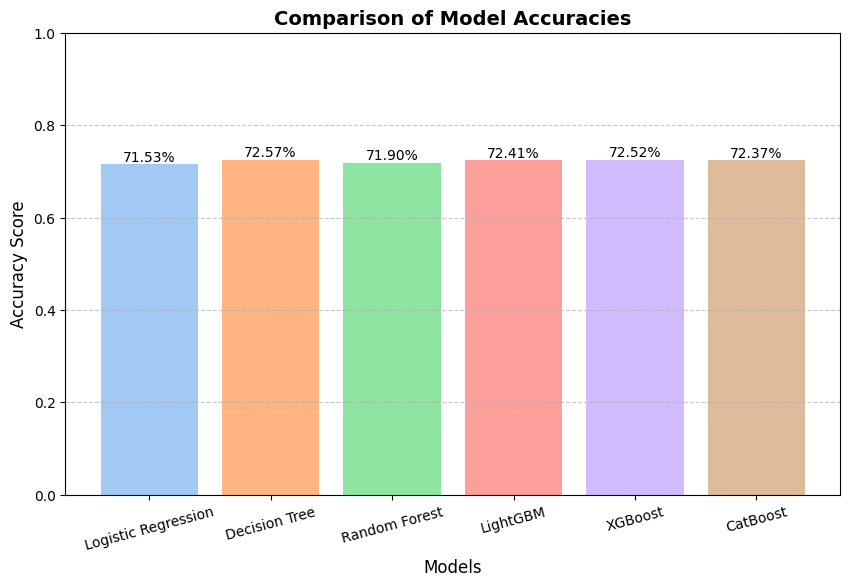

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'LightGBM', 'XGBoost', 'CatBoost']
accuracies = [acc_lr, acc_dt, acc_rf, acc_lgb, acc_xgb, acc_cat]

colors = sns.color_palette("pastel", len(models))

plt.figure(figsize=(10, 6))

# 바 차트 그리기
bars = plt.bar(models, accuracies, color=colors,  linewidth=1.2)

plt.ylim(0, 1)

for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"{acc:.2%}",
             ha='center', va='bottom', fontsize=10)


plt.xlabel("Models", fontsize=12)
plt.ylabel("Accuracy Score", fontsize=12)
plt.title("Comparison of Model Accuracies", fontsize=14, fontweight='bold')
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()